In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\USER\Downloads\district wise rainfall normal.csv")
df.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [4]:
df.shape

(641, 19)

* So we have 641 rows and 19 Columns in our data set

In [5]:
df.dtypes

STATE_UT_NAME     object
DISTRICT          object
JAN              float64
FEB              float64
MAR              float64
APR              float64
MAY              float64
JUN              float64
JUL              float64
AUG              float64
SEP              float64
OCT              float64
NOV              float64
DEC              float64
ANNUAL           float64
Jan-Feb          float64
Mar-May          float64
Jun-Sep          float64
Oct-Dec          float64
dtype: object

* In The dataset there are 17 numeric column and 2 categorical column

In [6]:
df.isnull().sum()

STATE_UT_NAME    0
DISTRICT         0
JAN              0
FEB              0
MAR              0
APR              0
MAY              0
JUN              0
JUL              0
AUG              0
SEP              0
OCT              0
NOV              0
DEC              0
ANNUAL           0
Jan-Feb          0
Mar-May          0
Jun-Sep          0
Oct-Dec          0
dtype: int64

* There is no missing value in the data set

In [7]:
df['DISTRICT'].value_counts()

DISTRICT
BIJAPUR        2
BILASPUR       2
AURANGABAD     2
HAMIRPUR       2
NICOBAR        1
              ..
GONDA          1
GORAKHPUR      1
HARDOI         1
JAUNPUR        1
LAKSHADWEEP    1
Name: count, Length: 637, dtype: int64

In [8]:
df['STATE_UT_NAME'].value_counts()

STATE_UT_NAME
UTTAR PRADESH                  71
MADHYA PRADESH                 50
BIHAR                          38
MAHARASHTRA                    35
RAJASTHAN                      33
TAMIL NADU                     32
KARNATAKA                      30
ORISSA                         30
ASSAM                          27
GUJARAT                        26
JHARKHAND                      24
ANDHRA PRADESH                 23
JAMMU AND KASHMIR              22
HARYANA                        21
PUNJAB                         20
WEST BENGAL                    19
CHATISGARH                     18
ARUNACHAL PRADESH              16
KERALA                         14
UTTARANCHAL                    13
HIMACHAL                       12
NAGALAND                       11
MIZORAM                         9
MANIPUR                         9
DELHI                           9
MEGHALAYA                       7
SIKKIM                          4
TRIPURA                         4
PONDICHERRY                     4


### EDA


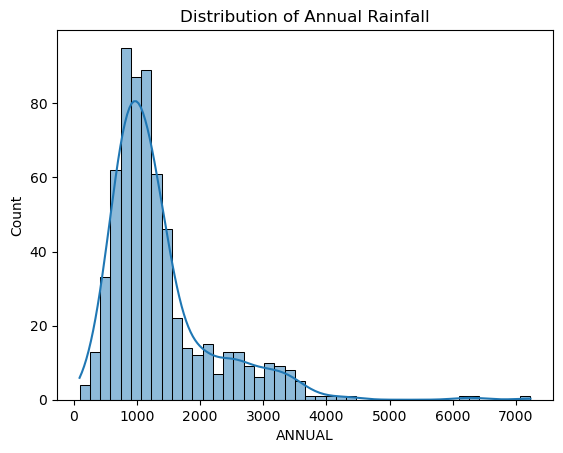

In [9]:
sns.histplot(df['ANNUAL'], kde=True)
plt.title("Distribution of Annual Rainfall")
plt.show()

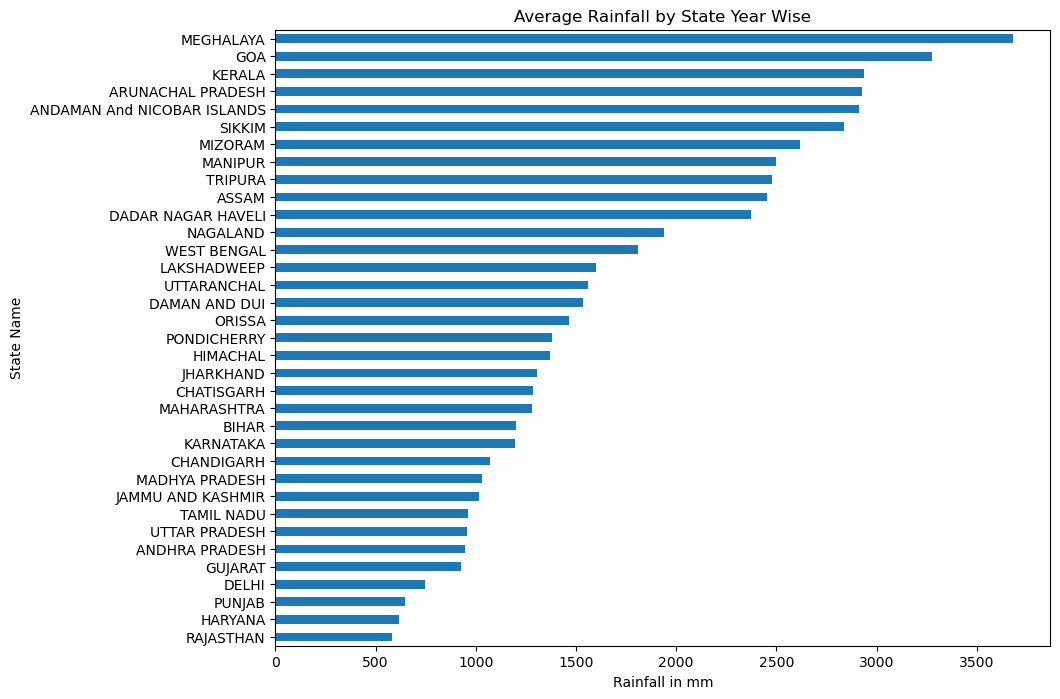

In [10]:
st_mean = df.groupby('STATE_UT_NAME')['ANNUAL'].mean().sort_values()
plt.figure(figsize=(10,8))
st_mean.plot(kind='barh')
plt.title('Average Rainfall by State Year Wise')
plt.xlabel('Rainfall in mm')
plt.ylabel('State Name')
plt.show()

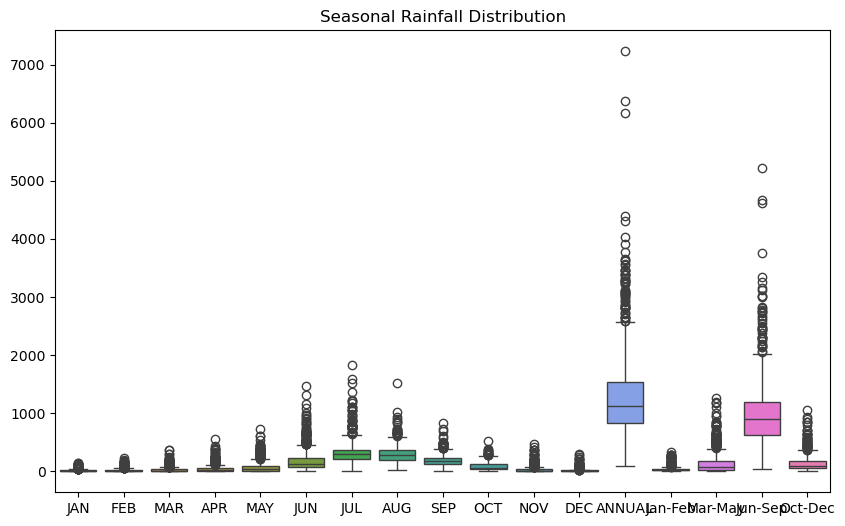

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Seasonal Rainfall Distribution")
plt.show()


* As we can see there are outliers present but as it is real data like real measurment of rain fall so removing outlier wont be a ggod practice we will check for skewness and will trau to transfom it

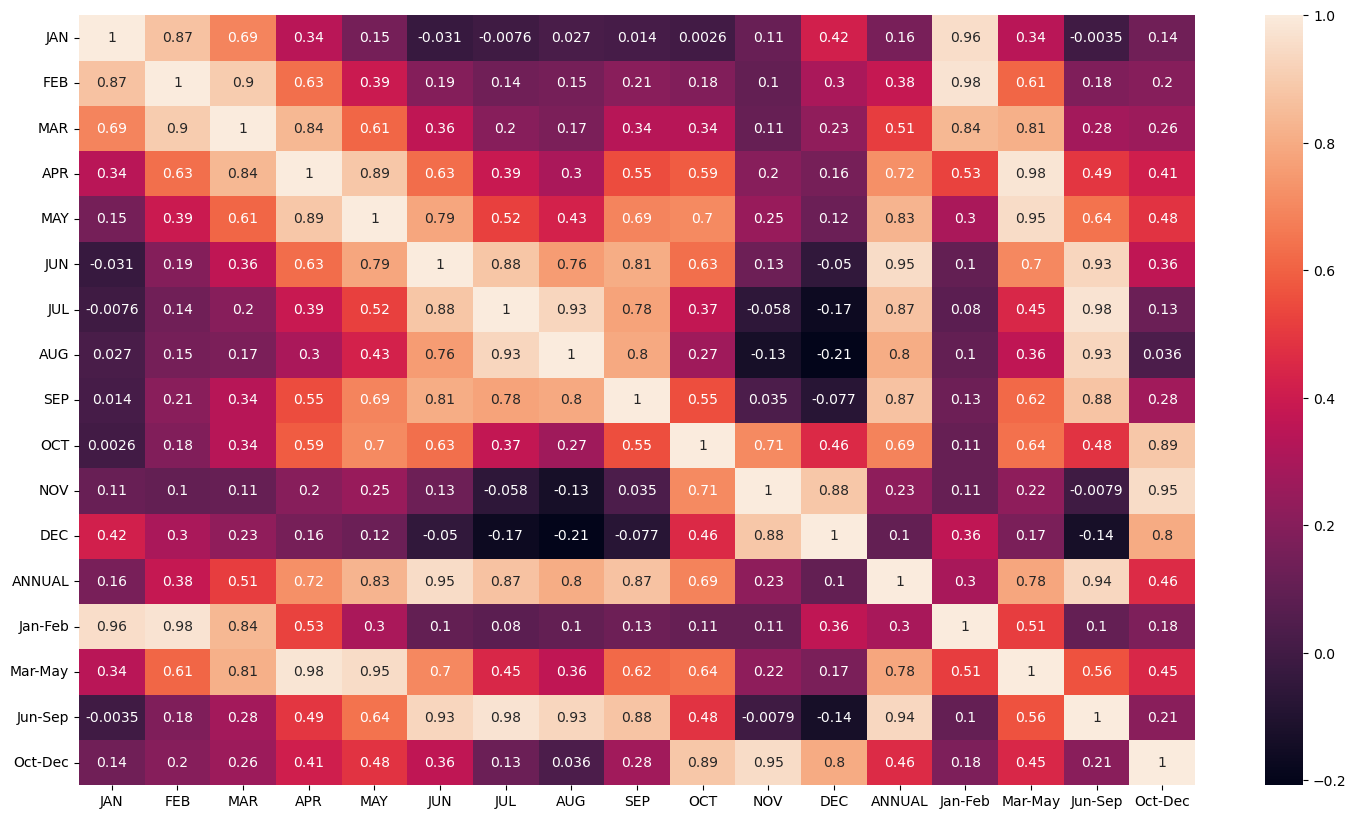

In [12]:
cor=df.drop(['STATE_UT_NAME','DISTRICT'],axis=1).corr()
plt.figure(figsize=(18,10))
sns.heatmap(cor,annot=True)
plt.show()

* As we can observe every column is having good correlation to target column which is 'ANNUAl'

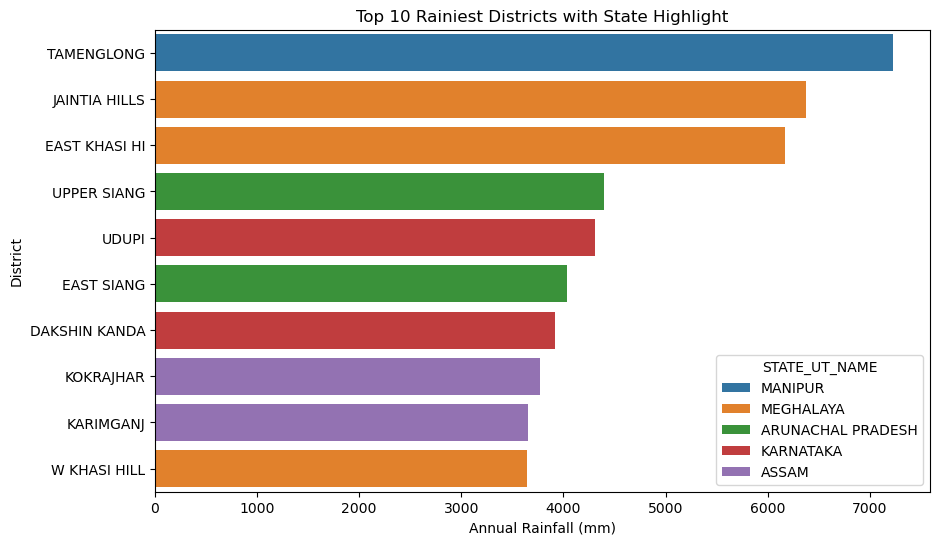

In [13]:
top_districts = df[['STATE_UT_NAME','DISTRICT','ANNUAL']].sort_values(by='ANNUAL', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='ANNUAL', y='DISTRICT', hue='STATE_UT_NAME', data=top_districts)
plt.title("Top 10 Rainiest Districts with State Highlight")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("District")
plt.show()



#### Checking for Skewness

In [14]:
for i in df.select_dtypes(include='float'):
    print(i,' --  ',df[i].skew())

JAN  --   2.895674165481089
FEB  --   3.399255611621903
MAR  --   3.4309981245687866
APR  --   2.7229548375197443
MAY  --   2.1201737315358717
JUN  --   2.378681784116228
JUL  --   2.3452637567823844
AUG  --   1.6536878961487964
SEP  --   1.5217886125823852
OCT  --   1.4132607391396206
NOV  --   3.7203695944856463
DEC  --   4.7145588639535285
ANNUAL  --   2.193688675305423
Jan-Feb  --   3.0094467553500577
Mar-May  --   2.2040841704450207
Jun-Sep  --   2.097636703273106
Oct-Dec  --   2.531455602555349


* AS we can see most of the variables are highly skewed we need to transform them

### Normalize data

In [15]:
df_n = df.select_dtypes(include='float')

for i in df_n.columns:
    df[i] = np.log(df[i].replace(0,np.nan))


In [16]:
for i in df.select_dtypes(include='float'):
    print(i,' --  ',df[i].skew())

JAN  --   -0.9072035626710523
FEB  --   -1.0284528469696468
MAR  --   -0.34314039075221375
APR  --   -0.29440655860353426
MAY  --   0.16135533115903303
JUN  --   0.0075820136692895555
JUL  --   -0.8301732036725952
AUG  --   -1.0952373933671247
SEP  --   -0.9977499742989526
OCT  --   -0.3197799236452886
NOV  --   0.5835742855629682
DEC  --   0.5746390168995907
ANNUAL  --   0.08902214843047537
Jan-Feb  --   -1.0943451704086804
Mar-May  --   0.07307027654308092
Jun-Sep  --   -0.6314583269833973
Oct-Dec  --   0.1484380144608068


### Spliting the data into training and testing

In [17]:
X=df.drop(['STATE_UT_NAME','DISTRICT','ANNUAL'],axis=1)
y=df['ANNUAL']

In [18]:
X.isnull().sum()

JAN        2
FEB        8
MAR        2
APR        4
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        2
Jan-Feb    1
Mar-May    0
Jun-Sep    0
Oct-Dec    0
dtype: int64

In [19]:
for i in X[['JAN','FEB','MAR','APR','DEC','Jan-Feb']]:
    X[i]=X[i].fillna(X[i].mean())

In [20]:
X.isnull().sum()

JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
Jan-Feb    0
Mar-May    0
Jun-Sep    0
Oct-Dec    0
dtype: int64

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

### Linear regression model

In [22]:

lr=LinearRegression()
lr.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:

y_pred=lr.predict(xtest)
y_pred

array([8.02259118, 6.35163852, 6.9448032 , 6.63382419, 7.61252638,
       7.22966225, 6.7226862 , 6.66102283, 6.91026419, 7.23030363,
       7.07060389, 7.06881116, 6.79518536, 7.49627499, 6.93725202,
       6.76660375, 5.96923221, 6.6003544 , 7.75126079, 8.05689688,
       7.23062794, 7.67268439, 7.40875617, 7.58590236, 7.2201503 ,
       7.59545287, 7.02865944, 7.2622393 , 7.4260988 , 8.11048273,
       6.220422  , 8.80720246, 6.43722827, 6.6588169 , 6.73018571,
       6.50339659, 7.47934215, 6.87871404, 7.55792033, 7.21172384,
       7.14398047, 6.19818595, 7.46543808, 7.13701593, 6.787495  ,
       8.1144293 , 6.72363832, 7.06351716, 6.1703722 , 6.85881931,
       8.19983975, 6.87892659, 6.28517978, 7.381838  , 7.51889173,
       6.3842548 , 6.68117886, 6.92842854, 7.44381861, 7.02367848,
       7.49627499, 6.88666051, 7.0018359 , 7.00072136, 6.78597781,
       7.68545662, 7.21390268, 6.82826331, 6.87376641, 8.13689654,
       7.8751421 , 7.03329393, 7.59548995, 6.78747038, 6.58192

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(ytest, y_pred)

print("MSE: ",mse)
print("MAE: ",mae)
print("RMSE: ",rmse)
print("R²: ",r2)


MSE:  0.008534049145647232
MAE:  0.0629013877415607
RMSE:  0.09237991743689335
R²:  0.9757370953640935


In [25]:
score = lr.score(xtest, ytest)
print("score of testing ", score)

score of testing  0.9757370953640935


In [26]:
score = lr.score(xtrain, ytrain)
print("score of training :", score)

score of training : 0.9715936708273729


* So there is no overfitting issue as training score and testing score is good

### Random Forest

In [27]:
rf = RandomForestRegressor(random_state=42)
rf.fit(xtrain, ytrain)
y_pred = rf.predict(xtest)

In [28]:
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R² score:", r2)


MSE: 0.011978561162350347
MAE: 0.0516845141575212
RMSE: 0.10944661329776426
R² score: 0.9659441043521858
